In [94]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ejercicios

1. Cargad el csv que obtuvimos en los ejercicios de la clase invertida de ayer. 


In [95]:
df = pd.read_csv('rating_performance_insight_map_replace.csv', index_col=0)

In [96]:
df.sample()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
510,Women Fashion Sexy Sleeveless Crop Cops en tri...,Women Fashion Sexy Sleeveless Knit Crop Tops,3.0,3,50000,No,3.81,11408,5065.0,2342.0,1964.0,890.0,1147.0,No,Buena,No,"corset top,Fashion,crop top,camisole,knittop,T...",wine red,S,Livraison standard,1,No,38,50,CN,mermaidskiss,86 % avis positifs,151249,5860c757b1e41d4d67d183e8,https://www.wish.com/c/587dc542c334b3508f79d68b,587dc542c334b3508f79d68b,4,90100,22525.0,4.049,151249.0,3.43,3.75,6290.0,0.0,Buena


2. ¿Qué columnas tienen nulos? 


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1573 entries, 0 to 1572
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   title_orig                   1573 non-null   object 
 2   price                        1573 non-null   float64
 3   retail_price                 1573 non-null   int64  
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   object 
 6   rating_x                     1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   rating_five_count            1528 non-null   float64
 9   rating_four_count            1528 non-null   float64
 10  rating_three_count           1528 non-null   float64
 11  rating_two_count             1528 non-null   float64
 12  rating_one_count             1528 non-null   float64
 13  badge_local_product    

El método any() en pandas se utiliza para comprobar si al menos un valor es verdadero (o equivalente a True) en un eje determinado (por columnas o por filas) de un DataFrame o una Serie

In [98]:
df.isnull() # Devuelve una máscara booleana del df

df.isnull().any(axis=0) # Devuelve una serie booleana indicando si hay al menos un nulo en cada columna

df.isnull().any() # Lo mismo, por defecto axis=0

title                          False
title_orig                     False
price                          False
retail_price                   False
units_sold                     False
uses_ad_boosts                 False
rating_x                       False
rating_count                   False
rating_five_count               True
rating_four_count               True
rating_three_count              True
rating_two_count                True
rating_one_count                True
badge_local_product            False
badge_product_quality          False
badge_fast_shipping            False
tags                           False
product_color                   True
product_variation_size_id       True
shipping_option_name           False
shipping_option_price          False
shipping_is_express            False
countries_shipped_to           False
inventory_total                False
origin_country                  True
merchant_name                   True
merchant_info_subtitle          True
m

In [99]:
df.isnull().sum()[df.isnull().sum()>0]

rating_five_count            45
rating_four_count            45
rating_three_count           45
rating_two_count             45
rating_one_count             45
product_color                41
product_variation_size_id    14
origin_country               17
merchant_name                 4
merchant_info_subtitle        1
dtype: int64

3. Explorad los nulos que hay en el DataFrame. 


In [100]:
# pd.DataFrame.select_dtypes

""" 
Signature: pd.DataFrame.select_dtypes(self, include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.
    """

" \nSignature: pd.DataFrame.select_dtypes(self, include=None, exclude=None) -> 'Self'\nDocstring:\nReturn a subset of the DataFrame's columns based on the column dtypes.\n\nParameters\n----------\ninclude, exclude : scalar or list-like\n    A selection of dtypes or strings to be included/excluded. At least\n    one of these parameters must be supplied.\n\nReturns\n-------\nDataFrame\n    The subset of the frame including the dtypes in ``include`` and\n    excluding the dtypes in ``exclude``.\n    "

Quiero seleccionar las columnas numéricas y las categóricas

In [101]:
# El df solo las columnas numéricas sería:

df_cols_numericas = df.select_dtypes(include=np.number) # Forma (1573, 23)

# ¿En qué columnas hay nulos?

df_cols_numericas.isnull().sum()[df_cols_numericas.isnull().sum()>0]

rating_five_count     45
rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64

In [102]:
# El df solo las columnas categóricas sería:

df_cols_categoricas = df.select_dtypes(include=object) # Forma (1573, 18)

# ¿En qué columnas hay nulos?

df_cols_categoricas.isnull().sum()[df_cols_categoricas.isnull().sum()>0]


product_color                41
product_variation_size_id    14
origin_country               17
merchant_name                 4
merchant_info_subtitle        1
dtype: int64

4. Con lo aprendido en la lección de hoy gestiona los nulos de la forma que consideres más correcta. Mañana en clase discutiremos sobre los métodos elegidos. 


In [103]:
# Empezamos con las columnas categóricas.

# El df solo las columnas categóricas sería:

df_cols_categoricas = df.select_dtypes(include=object) # Forma (1573, 18)

# ¿En qué columnas hay nulos?

df_cols_categoricas.isnull().sum()[df_cols_categoricas.isnull().sum()>0]

nombres = df_cols_categoricas.isnull().sum()[df_cols_categoricas.isnull().sum()>0].index

type(nombres) # Es un Index

lista_columnas_categoricas_con_nulos = nombres.tolist()

lista_columnas_categoricas_con_nulos

['product_color',
 'product_variation_size_id',
 'origin_country',
 'merchant_name',
 'merchant_info_subtitle']

In [104]:
# Ahora que empiezo a hacer modificaciones, voy a hacer una copia del df

df_copy = df.copy()

In [105]:
valores_unicos_pc = df['product_color'].value_counts() # Devuelve una Serie.
type(valores_unicos_pc)

pandas.core.series.Series

In [106]:
df['product_color']

0              white
1              green
2       leopardprint
3              black
4             yellow
            ...     
1568        navyblue
1569       lightblue
1570           white
1571           white
1572             red
Name: product_color, Length: 1573, dtype: object

In [107]:
df['product_color'].mode()

0    black
Name: product_color, dtype: object

In [108]:
type(df['product_color'].mode())

pandas.core.series.Series

In [109]:
# Para sacar el valor de la moda puedo:

df['product_color'].mode() # Ojo, esto nos devuelve una Serie.

df['product_color'].mode().values.tolist()[0] # Esto funcionaría, pero...

df['product_color'].mode().iloc[0] # Esto es más eficiente.


'black'

In [110]:
valor_moda = df['product_color'].mode().iloc[0] 

# ¿Cuántas veces aparece la moda en la columna?

df['product_color'].value_counts() # Me devuelve una Serie con todo el conteo de valores únicos 

frecuencia_moda = df['product_color'].value_counts().loc[valor_moda] # filtro con la moda 
frecuencia_moda


302

In [111]:
df['product_color'].loc[0]

'white'

In [122]:
# Evaluamos los valores de las columnas categóricas para determinar cómo imputar los nulos.

for col in lista_columnas_categoricas_con_nulos:
    print("------------")
    print(f"Análisis columna {col.upper()}: {col}\n")
    total_nulos = df[col].isnull().sum()
    total_no_nulos = df[col].notnull().sum()
    print(f"Hay {total_nulos} nulos y {total_no_nulos} no nulos ")
    print(f"Proporción de nulos: {np.round(100*total_nulos/df.shape[0], 2)}%\n")
    
    # Quiero conocer la moda y saber en qué proporción aparece 
    moda = df[col].mode().iloc[0] # Devuelve la cadena con el término de la moda
    frecuencia_moda = df[col].value_counts().loc[moda]
    print(f"La moda es {moda} y se repite {frecuencia_moda} veces")

    # Estudio la proporción de los valores únicos de cada columna

    display(np.round(df[col].value_counts()/df.shape[0], 2))


------------
Análisis columna PRODUCT_COLOR: product_color

Hay 41 nulos y 1532 no nulos 
Proporción de nulos: 2.61%

La moda es black y se repite 302 veces


product_color
black                 0.19
white                 0.16
yellow                0.07
blue                  0.06
pink                  0.06
                      ... 
greysnakeskinprint    0.00
denimblue             0.00
red & blue            0.00
offwhite              0.00
gold                  0.00
Name: count, Length: 101, dtype: float64

------------
Análisis columna PRODUCT_VARIATION_SIZE_ID: product_variation_size_id

Hay 14 nulos y 1559 no nulos 
Proporción de nulos: 0.89%

La moda es S y se repite 641 veces


product_variation_size_id
S                      0.41
XS                     0.23
M                      0.13
XXS                    0.06
L                      0.03
                       ... 
6XL                    0.00
AU plug Low quality    0.00
XXXL                   0.00
25-S                   0.00
SIZE S                 0.00
Name: count, Length: 106, dtype: float64

------------
Análisis columna ORIGIN_COUNTRY: origin_country

Hay 17 nulos y 1556 no nulos 
Proporción de nulos: 1.08%

La moda es CN y se repite 1516 veces


origin_country
CN    0.96
US    0.02
VE    0.00
SG    0.00
AT    0.00
GB    0.00
Name: count, dtype: float64

------------
Análisis columna MERCHANT_NAME: merchant_name

Hay 4 nulos y 1569 no nulos 
Proporción de nulos: 0.25%

La moda es 广州唯适唯服饰有限公司 y se repite 15 veces


merchant_name
广州唯适唯服饰有限公司                              0.01
greatexpectationstechnology              0.01
sjhdstoer                                0.01
shuilingjiaointernationaltradecompany    0.01
sangboostore                             0.01
                                         ... 
asmalltwistofsweetfruit                  0.00
supumawallsticker                        0.00
haoyouduooo                              0.00
successed                                0.00
aishoppingmall                           0.00
Name: count, Length: 957, dtype: float64

------------
Análisis columna MERCHANT_INFO_SUBTITLE: merchant_info_subtitle

Hay 1 nulos y 1572 no nulos 
Proporción de nulos: 0.06%

La moda es np.nan y se repite 285 veces


merchant_info_subtitle
np.nan                                            0.18
86 % avis positifs                                0.09
85 % avis positifs                                0.08
87 % avis positifs                                0.07
88 % avis positifs                                0.07
                                                  ... 
(117,487 ការវាយតម្លៃ)                             0.00
(33,303 ratings)                                  0.00
91% Feedback pozitiv (1,038 rating)               0.00
81% opinii pozytywnych (liczba ocen: 37,753)      0.00
88% Feedback positivo (151,914 classificações)    0.00
Name: count, Length: 90, dtype: float64

In [128]:
# Análisis de los resultados (¿Habría que detallar más? ¿Así es suficiente?)
# 
# Imputaré con 'unknown' en los casos en que no existe una categoría dominante:

lista_columnas_imputar_unknown = ['product_color', 'product_variation_size_id', 'merchant_name', 'merchant_info_subtitle'] 

# Imputaré con la moda en el caso de origin_country, donde el valor CN aparece el 96% de las veces.

lista_columnas_imputar_moda = ['origin_country']

In [126]:
# Como voy a empezar las transformaciones, me guardo una copia de mi df original.

df_copia = df.copy()

In [127]:
# Imputo los nulos con 'unknown'

for col in lista_columnas_imputar_unknown:
    df[col] = df[col].fillna('unknown')

# Compruebo que he eliminado los nulos
for col in lista_columnas_imputar_unknown:
    print(f"Total nulos en {col} es {df[col].isnull().sum()}")

Total nulos en product_color es 0
Total nulos en product_variation_size_id es 0
Total nulos en merchant_name es 0
Total nulos en merchant_info_subtitle es 0


In [130]:
# Imputo los nulos con la moda

for col in lista_columnas_imputar_moda:
    moda = df[col].mode().iloc[0]
    df[col] = df[col].fillna(moda)

# Compruebo que he eliminado los nulos
for col in lista_columnas_imputar_moda:
    print(f"Total nulos en {col} es {df[col].isnull().sum()}")


Total nulos en origin_country es 0


In [146]:
# Como han ido bien las transformaciones, hago una copia de mi dataframe.

df_copia_cols_categoricas_sin_nulos = df.copy()

Vamos con las columnas numéricas.

In [142]:
# ¿Qué columnas numéricas tienen nulos?

df.select_dtypes(include=np.number).isnull().sum()[df.select_dtypes(include=np.number).isnull().sum()>0]

columnas_numericas_con_nulos = df.select_dtypes(include=np.number).isnull().sum()[df.select_dtypes(include=np.number).isnull().sum()>0]
columnas_numericas_con_nulos

rating_five_count     45
rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64

In [153]:
lista_columnas_numericas_con_nulos = (columnas_numericas_con_nulos.index).tolist()

In [160]:
df.sample()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
229,ZANZEA Robe tunique grande taille pour femmes ...,ZANZEA Damen Übergröße Tunikakleid Kaftan Frei...,11.0,89,100,No,3.77,48,22.0,8.0,9.0,3.0,6.0,No,Buena,No,"damenkleid,plaincolordres,highwaistdres,Evenin...",orange-red,S,Livraison standard,2,No,37,50,CN,specialforyou_68,90 % avis positifs,104269,556d68d19fb8ca1a0c4d82ee,https://www.wish.com/c/5d5e5ca35cd08f2a40b53f48,5d5e5ca35cd08f2a40b53f48,2,1100,550.0,4.253,104269.0,11.5,87.5,375.0,87.64,Buena


In [171]:
# Estudiamos la proporción de nulos en las columnas numéricas, que en este caso a simple vista vemos que es pequeña.

for col in lista_columnas_numericas_con_nulos:
    print("------------------------")
    print(f"Analizamos la columna {col.upper()}: {col}")
    total_nulos = df[col].isnull().sum()
    print(f"Hay {total_nulos} nulos de un total de {df.shape[0]} valores")
    print(f"Proporción: {np.round(total_nulos/df.shape[0], 2)} %\n")
    print("Sus principales estadísticos son:")
    display(df[col].describe())

------------------------
Analizamos la columna RATING_FIVE_COUNT: rating_five_count
Hay 45 nulos de un total de 1573 valores
Proporción: 0.03 %

Sus principales estadísticos son:


count     1528.000000
mean       442.263743
std        980.203270
min          0.000000
25%         12.000000
50%         79.000000
75%        413.500000
max      11548.000000
Name: rating_five_count, dtype: float64

------------------------
Analizamos la columna RATING_FOUR_COUNT: rating_four_count
Hay 45 nulos de un total de 1573 valores
Proporción: 0.03 %

Sus principales estadísticos son:


count    1528.000000
mean      179.599476
std       400.516231
min         0.000000
25%         5.000000
50%        31.500000
75%       168.250000
max      4152.000000
Name: rating_four_count, dtype: float64

------------------------
Analizamos la columna RATING_THREE_COUNT: rating_three_count
Hay 45 nulos de un total de 1573 valores
Proporción: 0.03 %

Sus principales estadísticos son:


count    1528.000000
mean      134.549738
std       311.690656
min         0.000000
25%         4.000000
50%        24.000000
75%       129.250000
max      3658.000000
Name: rating_three_count, dtype: float64

------------------------
Analizamos la columna RATING_TWO_COUNT: rating_two_count
Hay 45 nulos de un total de 1573 valores
Proporción: 0.03 %

Sus principales estadísticos son:


count    1528.000000
mean       63.711387
std       151.343933
min         0.000000
25%         2.000000
50%        11.000000
75%        62.000000
max      2003.000000
Name: rating_two_count, dtype: float64

------------------------
Analizamos la columna RATING_ONE_COUNT: rating_one_count
Hay 45 nulos de un total de 1573 valores
Proporción: 0.03 %

Sus principales estadísticos son:


count    1528.000000
mean       95.735602
std       214.075544
min         0.000000
25%         4.000000
50%        20.000000
75%        94.000000
max      2789.000000
Name: rating_one_count, dtype: float64

148

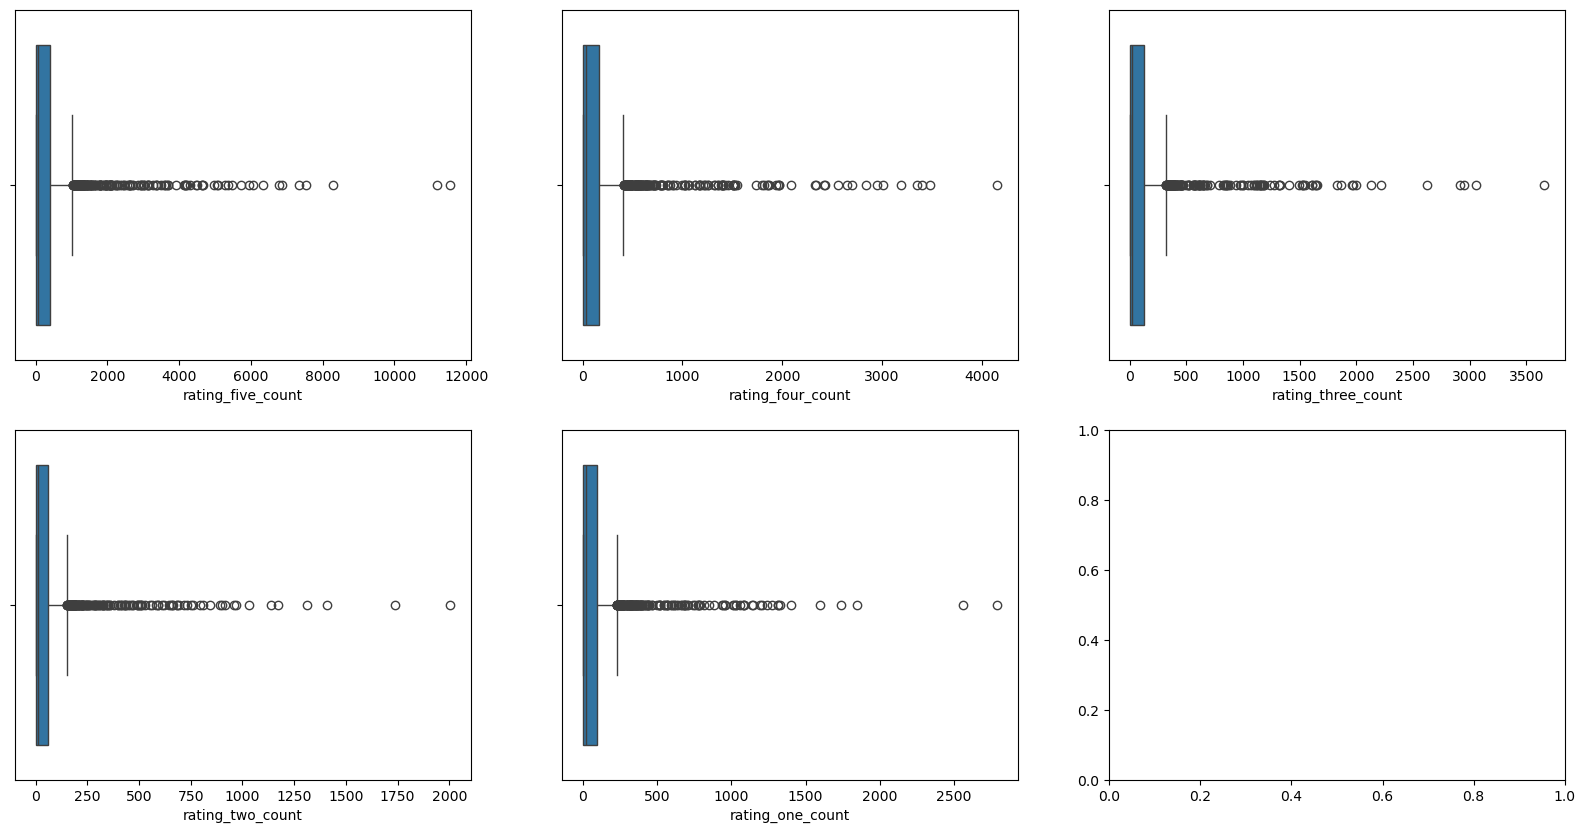

In [184]:
# Por los datos se pueden intuir algunos outliers en las columnas, pero veremos mejor si tenemos valores atípicos con visualización. 

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(lista_columnas_numericas_con_nulos):
    sns.boxplot(x = col, data = df, ax = axes[indice])

# Vemos que en todos los casos hay MUCHOS valores atípicos. No podemos hacer imputación simple.

# Por curiosidad, ¿cuántos outliers hay en cada col? Aproximadamente...

df['rating_five_count'][df['rating_five_count'] > 1000].count() # 183 outliers aprox
df['rating_four_count'][df['rating_four_count'] > 300].count() # 252 outliers aprox
df['rating_three_count'][df['rating_three_count'] > 400].count() # 108 outliers aprox
df['rating_two_count'][df['rating_two_count'] > 140].count() # 179 outliers aprox
df['rating_one_count'][df['rating_one_count'] > 250].count() # 148 outliers aprox


A pesar de que la proporción de nulos es pequeña, en todos los casos hay MUCHOS valores atípicos. No podemos hacer imputación simple.

Opciones: imputación compleja con métodos avanzados como KNNImputer y IterativeImputer. 

Vamos a calcular ambos para luego comparar. Pero primero la sintaxis.

**Iterative Imputer** 

```python
# Crear una instancia del IterativeImputer. NOTA: Pondremos siempre 20 y 42. 
imputer = IterativeImputer(max_iter, random_state)

# Ajustar y transformar los datos. 
data_imputed = imputer.fit_transform(datos)
```
**KNN Imputer** (k-Nearest Neighbors)

```python
# Crear una instancia del KNNImputer. NOTA: por defecto se suele poner 5.
imputer = KNNImputer(n_neighbors=n_vecinos)

# Ajustar y transformar los datos
data_imputed = imputer.fit_transform(datos)
```

In [194]:
# Método IterativeImputer del módulo impute de scikit-learn

# Multivariate imputer that estimates each feature from all the others.
# A strategy for imputing missing values by modeling each feature with missing values 
# as a function of other features in a round-robin fashion.
    
imputer = IterativeImputer(max_iter= 20, random_state=42)

imputer_iterative_imputado = imputer.fit_transform(df[['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count','rating_one_count']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[2.600e+01, 8.000e+00, 1.000e+01, 1.000e+00, 9.000e+00],
       [2.269e+03, 1.027e+03, 1.118e+03, 6.440e+02, 1.077e+03],
       [5.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 3.000e+00],
       ...,
       [2.400e+01, 1.500e+01, 8.000e+00, 3.000e+00, 9.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]])

Añado al df las columnas con el resultado de las imputaciones por InteractiveImputer

In [195]:
df[['rating_five_count_iter', 'rating_four_count_iter', 'rating_three_count_iter', 'rating_two_count_iter', 'rating_one_count_iter']] = imputer_iterative_imputado

In [196]:
# Hacemos lo mismo con el KNNImputer. NOTA: la ejecución de esta celda puede tardar un ratito

imputer_knn = KNNImputer(n_neighbors = 5)

imputer_knn_imputado = imputer_knn.fit_transform(df[['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count','rating_one_count']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[2.600e+01, 8.000e+00, 1.000e+01, 1.000e+00, 9.000e+00],
       [2.269e+03, 1.027e+03, 1.118e+03, 6.440e+02, 1.077e+03],
       [5.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 3.000e+00],
       ...,
       [2.400e+01, 1.500e+01, 8.000e+00, 3.000e+00, 9.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]])

Añado al df las columnas con el resultado de las imputaciones por KNN

In [190]:
df[['rating_five_count_knn', 'rating_four_count_knn', 'rating_three_count_knn', 'rating_two_count_knn', 'rating_one_count_knn']] = imputer_knn_imputado

Y ahora, para cada columna, compruebo los estadísticos para elegir el método que menos modifique los estadísticos de original.

In [191]:
df[['rating_five_count', 'rating_five_count_knn', 'rating_five_count_iter']].describe()

,rating_five_count,rating_five_count_knn,rating_five_count_iter
count,1528.000000,1573.000000,1573.000000
mean,442.263743,442.263743,442.263743
std,980.203270,966.071776,966.071776
min,0.000000,0.000000,0.000000
25%,12.000000,13.000000,13.000000
50%,79.000000,86.000000,86.000000
75%,413.500000,442.263743,442.263743
max,11548.000000,11548.000000,11548.000000


In [192]:
df[['rating_four_count', 'rating_four_count_knn', 'rating_four_count_iter' ]].describe()

,rating_four_count,rating_four_count_knn,rating_four_count_iter
count,1528.000000,1573.000000,1573.000000
mean,179.599476,179.599476,179.599476
std,400.516231,394.742028,394.742028
min,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000
50%,31.500000,35.000000,35.000000
75%,168.250000,179.599476,179.599476
max,4152.000000,4152.000000,4152.000000


In [193]:
df[['rating_three_count', 'rating_three_count_knn', 'rating_three_count_iter' ]].describe()

,rating_three_count,rating_three_count_knn,rating_three_count_iter
count,1528.000000,1573.000000,1573.000000
mean,134.549738,134.549738,134.549738
std,311.690656,307.197043,307.197043
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000
50%,24.000000,26.000000,26.000000
75%,129.250000,134.549738,134.549738
max,3658.000000,3658.000000,3658.000000


In [133]:
df[['rating_two_count', 'rating_two_count_knn', 'rating_two_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_two_count,rating_two_count_knn,rating_two_count_iter
count,1528.000000,1573.000000,1573.000000
mean,63.711387,63.711387,63.711387
std,151.343933,149.162023,149.162023
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,11.000000,12.000000,12.000000
75%,62.000000,63.711387,63.711387
max,2003.000000,2003.000000,2003.000000


In [198]:
df[['rating_one_count', 'rating_one_count_knn', 'rating_one_count_iter' ]].describe()
# nos podemos quedar con el iterative o con el knn

,rating_one_count,rating_one_count_knn,rating_one_count_iter
count,1528.000000,1573.000000,1573.000000
mean,95.735602,95.735602,95.735602
std,214.075544,210.989239,210.989239
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000
50%,20.000000,22.000000,22.000000
75%,94.000000,95.735602,95.735602
max,2789.000000,2789.000000,2789.000000


Viendo que los datos son exactamente iguales (confuso: comprobar que está bien hecho), nos quedamos con el método del interative imputer.

In [199]:
columnas_borrar = ['rating_one_count', 'rating_one_count_knn', 'rating_two_count', 'rating_two_count_knn', 'rating_three_count', 'rating_three_count_knn', 'rating_four_count', 'rating_four_count_knn', 'rating_five_count', 'rating_five_count_knn']


Borramos las columnas que no vamos a usar y cambiamos el nombre de las que hemos imputado.

In [200]:
df.drop(columnas_borrar, axis = 1, inplace = True)

In [203]:
df_copia2 = df.copy()
df_copia2.sample()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_five_count_iter,rating_four_count_iter,rating_three_count_iter,rating_two_count_iter,rating_one_count_iter
378,7 couleurs femmes mode d'été Bikini ensemble i...,7 Colors Women Summer Fashion Bikini Set Flora...,12.0,59,5000,No,3.47,371,No,Buena,No,"Summer,Plus Size,Halter,Women's Fashion,Shorts...",white,S,Standard Shipping,3,No,41,50,CN,chenqinq,"86% Positive Feedback (3,592 ratings)",3592,5ae296b6cd968d66be12d247,https://www.wish.com/c/5e1441859fe5367b00bb3b54,5e1441859fe5367b00bb3b54,3,7000,2333.0,4.062,3592.0,8.67,24.33,266.0,79.66,Buena,137.0,64.0,69.0,40.0,61.0


In [204]:
nuevo_nombre = {
    'rating_one_count_iter': 'rating_one_count',  
    'rating_two_count_iter': 'rating_two_count',
    'rating_three_count_iter': 'rating_three_count',
    'rating_four_count_iter': 'rating_four_count',
    'rating_five_count_iter': 'rating_five_count',
}
df.rename(columns = nuevo_nombre, inplace = True)

In [206]:
# Compruebo que no quedan nulos en el dataframe

df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

Guardamos el cvs.

In [207]:
df.to_csv("merchant_fill_no_nulls_05_10_2024.csv")